# Real-time adaptive filtering

Adapted from `padasip` example code: (http://matousc89.github.io/padasip/)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa 

In [2]:
# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x
    
def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d

filt = pa.filters.FilterLMS(3, mu=1.)

N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)

for k in range(N):
    
    x = measure_x()
    y = filt.predict(x)
    d = measure_d(x)
    filt.adapt(d, x)
    
    # log values
    log_d[k] = d
    log_y[k] = y

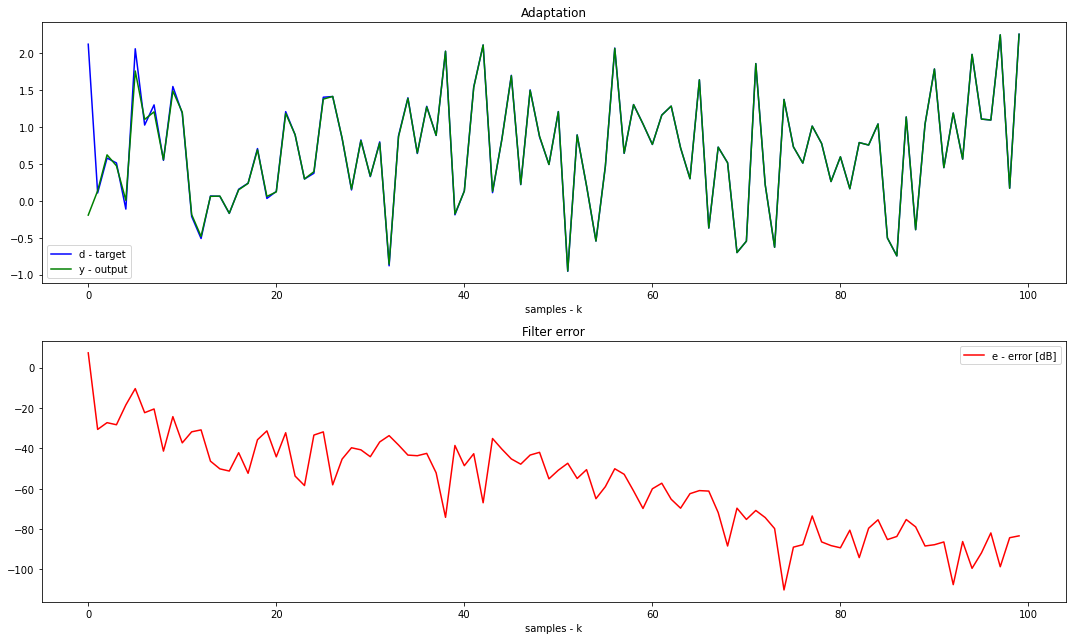

In [2]:
plt.figure(figsize=(15,9))

plt.subplot(211)
plt.title("Adaptation")
plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output")
plt.legend()

plt.subplot(212)
plt.title("Filter error")
plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend()
plt.tight_layout()
plt.show()